# [9660] Exercise # 6 - Decision Tree
Data file:
* sklearn : wine

## Exercise # 6 Requirements
* Load data into dataframe
* Examine data
* Prepare data for model training and testing
  * Separate independent and dependent variables
  * Split train and test sets
* Train decision tree classifier model with default hyperparameters
  * Predict using the test set
  * Calculate and display model accuracy
  * Display feature importances
  * Visualize decision tree
* Train decision tree classifier model with at least 1 different hyperparameter
  * Predict using the test set
  * Calculate and display model accuracy
  * Display feature importances
  * Visualize decision tree

In [100]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 11/05/24 01:21:13


### Mount your Google Drive
Execute the cell below and carefully follow the instructions

In [101]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [102]:
# The location below is your Google Drive
%cd "/content/gdrive/My Drive/CIS9660"

# The location below is the professor's Google Drive folder for this class
#%cd "/content/gdrive/My Drive/BaruchCollege/Fall 2024/CIS9660_URA_DataMiningForBusinessAnalytics/ColabNotebooks"

/content/gdrive/My Drive/CIS9660


### Import libraries

In [103]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import cv2

### Load data

In [104]:
# Use load_wine()
wine = load_wine()

In [105]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['class'] = wine.target
df.shape

(178, 14)

### Examine data

In [106]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [107]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### Check for missing values

In [114]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


### Separate independent and dependent variables

In [115]:
# Setup independent and dependent variables
X = df.drop(['class'], axis = 1)
y = df['class']

### Split data into training and test sets

In [116]:
# Split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=42)

### Train model

In [117]:
# Fit a DecisionTreeClassifier model
tree_1 = DecisionTreeClassifier(random_state=42)
tree_1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

### Evaluate model

In [118]:
tree_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [119]:
# Predict using the test set
y_pred = tree_1.predict(X_test)

In [120]:
# Print model accuracy score
accuracy_score_1 = accuracy_score(y_test, y_pred)
print(f"Accuracy = {round((accuracy_score_1 * 100), 4)}%")

Accuracy = 94.4444%


In [121]:
# Display feature importances
tree_1.feature_importances_

array([0.        , 0.01873775, 0.02016329, 0.02086548, 0.        ,
       0.        , 0.40807303, 0.        , 0.        , 0.40018907,
       0.        , 0.02098628, 0.11098512])

In [123]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### Visualize model output

In [124]:
# Visualize decision tree. Create dot file.
export_graphviz(
    tree_1,
    out_file = 'images/DT_1.dot',
    feature_names = wine.feature_names,
    class_names = wine.target_names,
    filled = True,
    rounded = True
)

In [125]:
# Linux command to draw a directed graph from a representation of decision tree (dot file).
!dot -Tpng images/DT_1.dot -o images/DT_1.png

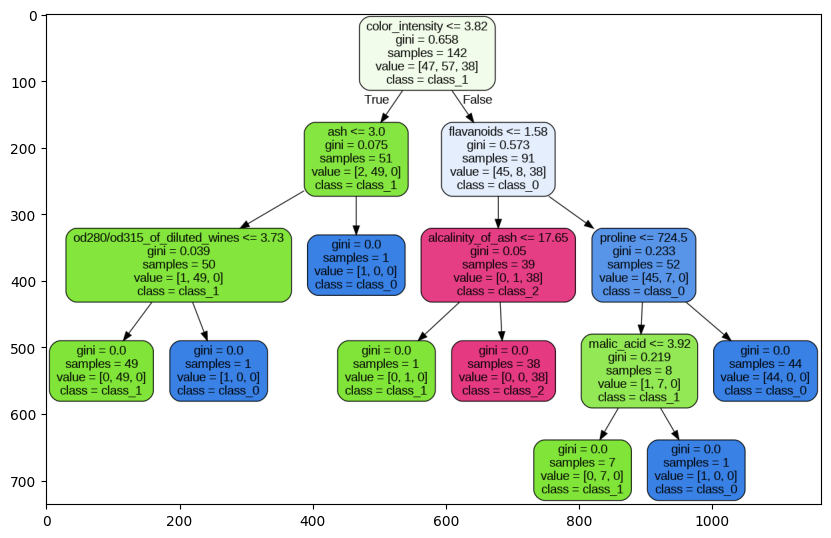

In [126]:
# Display directed graph
img = cv2.imread('images/DT_1.png')
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()

### Train model with different hyperparameters

In [127]:
# Fit a DecisionTreeClassifier model with a different max_depth value
tree_2 = DecisionTreeClassifier(max_depth=3, criterion='entropy', min_samples_split=3, random_state=42)
tree_2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [128]:
tree_2.fit(X_train, y_train)
tree_2.get_depth()

3

### Evaluate model

In [129]:
# Predict using the test set
y_pred = tree_2.predict(X_test)

In [130]:
# Print model accuracy score
accuracy_score_1 = accuracy_score(y_test, y_pred)
print(f"Accuracy = {round((accuracy_score_1 * 100), 4)}%")

Accuracy = 97.2222%


In [131]:
# Display feature importances
tree_2.feature_importances_

array([0.0183451 , 0.        , 0.        , 0.03056031, 0.        ,
       0.        , 0.40814422, 0.        , 0.        , 0.25127244,
       0.        , 0.        , 0.29167794])

### Visualize model output

In [132]:
# Visualize decision tree. Create dot file.
export_graphviz(
            tree_2,
            out_file = 'images/DT_2.dot',
            feature_names = wine.feature_names,
            class_names = wine.target_names,
            filled = True,
            rounded = True)

In [133]:
# Linux command to draw a directed graph from a representation of decision tree (dot file).
! dot -Tpng images/DT_2.dot -o images/DT_2.png

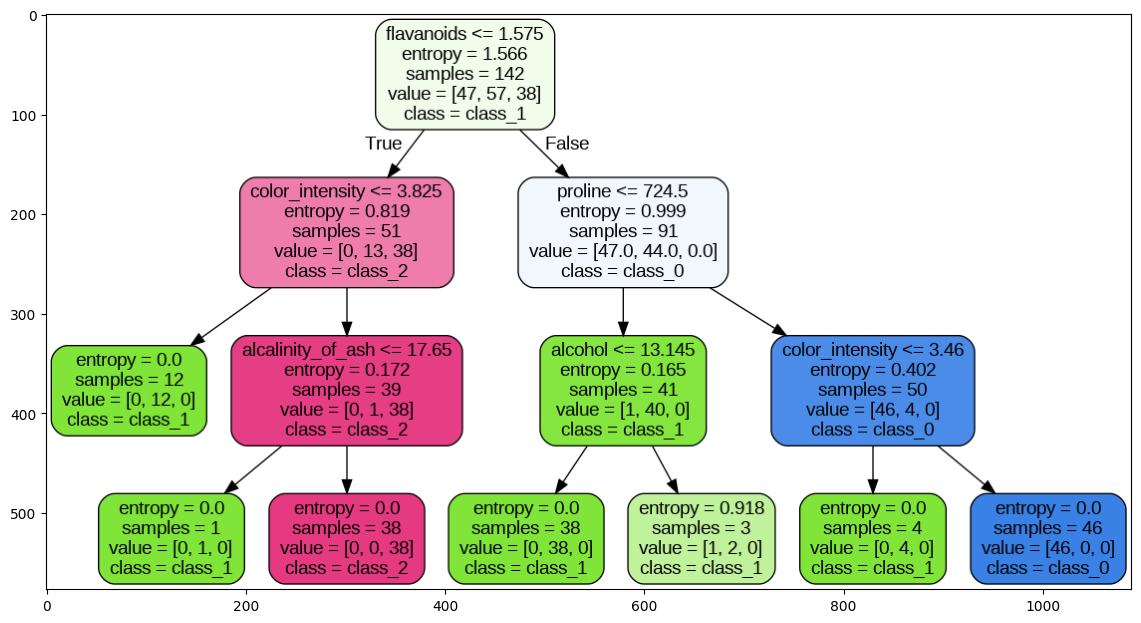

In [134]:
# Display directed graph
img = cv2.imread('images/DT_2.png')
plt.figure(figsize = (14, 10))
plt.imshow(img)
plt.show()